##1.Downloading data from folder on Google Drive##

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

In [ ]:
drive.mount('/gdrive')
%cd /gdrive
path = '/gdrive/My Drive/Colab Notebooks/Datafiles/Heart Disease Detection/processed.cleveland.data'
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
         'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
data = pd.read_csv(path, names=names, header=None)
data

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


##2. Data Preprocessing##

**Checking Nans**

In [ ]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Zero Nans means that no preprocessing needed.

**Checking for string values**

In [ ]:
for name in names:
  print(data[name].unique())

[63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
[1. 0.]
[1. 4. 3. 2.]
[145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]
[233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183. 407. 217. 288. 220. 209. 227. 261. 174. 281.
 221. 205. 240. 289. 318. 298. 564. 246. 322. 299. 300. 29

There "?" in "ca" and thal columns and also all values are string. Let's check how many there are "?".

In [ ]:
print(data[data['ca']=='?'])
print(data[data['thal']=='?'])

      age  sex   cp  trestbps   chol  fbs  ...  exang  oldpeak  slope  ca  thal num
166  52.0  1.0  3.0     138.0  223.0  0.0  ...    0.0      0.0    1.0   ?   3.0   0
192  43.0  1.0  4.0     132.0  247.0  1.0  ...    1.0      0.1    2.0   ?   7.0   1
287  58.0  1.0  2.0     125.0  220.0  0.0  ...    0.0      0.4    2.0   ?   7.0   0
302  38.0  1.0  3.0     138.0  175.0  0.0  ...    0.0      0.0    1.0   ?   3.0   0

[4 rows x 14 columns]
      age  sex   cp  trestbps   chol  fbs  ...  exang  oldpeak  slope   ca  thal num
87   53.0  0.0  3.0     128.0  216.0  0.0  ...    0.0      0.0    1.0  0.0     ?   0
266  52.0  1.0  4.0     128.0  204.0  1.0  ...    1.0      1.0    2.0  0.0     ?   2

[2 rows x 14 columns]


There not so many of "?", so we can replace them with mode.

In [ ]:
data['ca'][data['ca']=='?'] = data['ca'].mode()[0]
data['thal'][data['thal']=='?'] = data['thal'].mode()[0]
for name in names:
  print(data[name].unique())

[63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
[1. 0.]
[1. 4. 3. 2.]
[145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]
[233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183. 407. 217. 288. 220. 209. 227. 261. 174. 281.
 221. 205. 240. 289. 318. 298. 564. 246. 322. 299. 300. 29

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Also let's transform 'ca' and 'thal' columns to float.

In [ ]:
data['ca'] = pd.to_numeric(data['ca'], downcast="float")
data['thal'] = pd.to_numeric(data['thal'], downcast="float")
for name in names:
  print(data[name].unique())

[63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
[1. 0.]
[1. 4. 3. 2.]
[145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]
[233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183. 407. 217. 288. 220. 209. 227. 261. 174. 281.
 221. 205. 240. 289. 318. 298. 564. 246. 322. 299. 300. 29

**Checking for correlation**

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

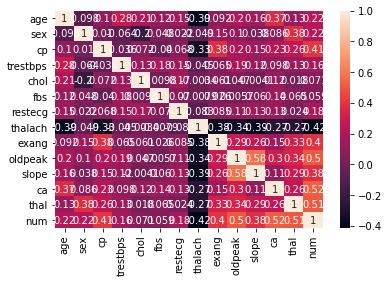

In [ ]:
corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

As we can see, there are no highly correlated features.

**Standardization and dividing into test and training**

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV

In [ ]:
X = data.drop(['num'],axis=1)
y = data['num']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
197,45.0,0.0,4.0,138.0,236.0,0.0,2.0,152.0,1.0,0.2,2.0,0.0,3.0
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
265,42.0,1.0,4.0,136.0,315.0,0.0,0.0,125.0,1.0,1.8,2.0,0.0,6.0
24,60.0,1.0,4.0,130.0,206.0,0.0,2.0,132.0,1.0,2.4,2.0,2.0,7.0
292,44.0,1.0,4.0,120.0,169.0,0.0,0.0,144.0,1.0,2.8,3.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,67.0,1.0,4.0,125.0,254.0,1.0,0.0,163.0,0.0,0.2,2.0,2.0,7.0
278,57.0,1.0,2.0,154.0,232.0,0.0,2.0,164.0,0.0,0.0,1.0,1.0,3.0
218,64.0,0.0,4.0,130.0,303.0,0.0,0.0,122.0,0.0,2.0,2.0,2.0,3.0
223,53.0,1.0,4.0,123.0,282.0,0.0,0.0,95.0,1.0,2.0,2.0,2.0,7.0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##3. Model Selection and training##

In [ ]:
models =[]
from sklearn.metrics import accuracy_score

**Linear Regression**


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_X, train_Y)
train_predictions = model.predict(test_X)
acc = (np.around(train_predictions) == test_Y).mean()
print('LinearRegresion: ', acc*100)
models.append(['LinearRegresion',acc * 100])

LinearRegresion:  55.73770491803278


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(3)
model.fit(train_X, train_Y)
train_predictions = model.predict(test_X)
y_pred=model.predict(X_test)
print('KNN3: ', accuracy_score(y_test,y_pred)*100)
models.append(['KNN3 ',accuracy_score(y_test,y_pred)*100])

KNN3:  49.18032786885246


In [ ]:
model = KNeighborsClassifier(4)
model.fit(train_X, train_Y)
train_predictions = model.predict(test_X)
y_pred=model.predict(X_test)
print('KNN4: ', accuracy_score(y_test,y_pred)*100)
models.append(['KNN4 ',accuracy_score(y_test,y_pred)*100])

KNN4:  39.34426229508197


In [ ]:
model = KNeighborsClassifier(5)
model.fit(train_X, train_Y)
train_predictions = model.predict(test_X)
y_pred=model.predict(X_test)
print('KNN5: ', accuracy_score(y_test,y_pred)*100)
models.append(['KNN5 ',accuracy_score(y_test,y_pred)*100])

KNN5:  54.09836065573771


In [ ]:
model = KNeighborsClassifier(6)
model.fit(train_X, train_Y)
train_predictions = model.predict(test_X)
y_pred=model.predict(X_test)
print('KNN6: ', accuracy_score(y_test,y_pred)*100)
models.append(['KNN6 ',accuracy_score(y_test,y_pred)*100])

KNN6:  55.73770491803278


**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('NB: ', accuracy_score(y_test,y_pred)*100)
models.append(['NB: ',accuracy_score(y_test,y_pred)*100])

NB:  59.01639344262295


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('LogisticRegression: ', accuracy_score(y_test,y_pred)*100)
models.append(['LogisticRegression: ',accuracy_score(y_test,y_pred)*100])

LogisticRegression:  65.57377049180327
[0 0 0 0 0 0 0 1 0 4 4 1 1 0 0 2 1 0 0 0 0 1 3 0 0 0 0 2 0 0 2 2 0 1 0 0 0
 1 4 2 0 4 3 0 4 1 0 3 0 1 0 1 0 1 2 0 0 1 3 0 1]
[0 0 0 0 0 0 0 0 0 1 3 3 3 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 3 0 1 0 0 2 0 0 0
 2 3 2 0 4 3 0 0 0 0 2 0 0 0 1 0 1 3 0 0 3 3 0 0]


**SVC**

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('SVC: ', accuracy_score(y_test,y_pred)*100)
models.append(['SVC: ',accuracy_score(y_test,y_pred)*100])

SVC:  62.295081967213115


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('RandomForestClassifier: ', accuracy_score(y_test,y_pred)*100)
models.append(['RandomForestClassifier: ',accuracy_score(y_test,y_pred)*100])

RandomForestClassifier:  60.65573770491803


**XGBoost**

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('XGBClassifier: ', accuracy_score(y_test,y_pred)*100)
models.append(['XGBClassifier: ',accuracy_score(y_test,y_pred)*100])

XGBClassifier:  60.65573770491803


**Adaboost**


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('AdaBoostClassifier: ', accuracy_score(y_test,y_pred)*100)
models.append(['AdaBoostClassifier: ',accuracy_score(y_test,y_pred)*100])

AdaBoostClassifier:  59.01639344262295


In [ ]:
models

[['LinearRegresion', 55.73770491803278],
 ['KNN3 ', 49.18032786885246],
 ['KNN4 ', 39.34426229508197],
 ['KNN5 ', 54.09836065573771],
 ['KNN6 ', 55.73770491803278],
 ['NB: ', 59.01639344262295],
 ['LogisticRegression: ', 65.57377049180327],
 ['SVC: ', 62.295081967213115],
 ['RandomForestClassifier: ', 60.65573770491803],
 ['XGBClassifier: ', 60.65573770491803],
 ['AdaBoostClassifier: ', 59.01639344262295]]

As we can see Logistic Regression has the best result.